## Polynomial Regression Task 2: Ice Cream Sales Prediction

### Step 1: Import Libraries and Load Data

In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [104]:
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\03-polynomial-regression\Ice_cream_selling_data.csv")
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


### Step 2: EDA + Preprocessing + Train test split

In [105]:
df.shape, df.isna().sum()

((49, 2),
 Temperature (°C)           0
 Ice Cream Sales (units)    0
 dtype: int64)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

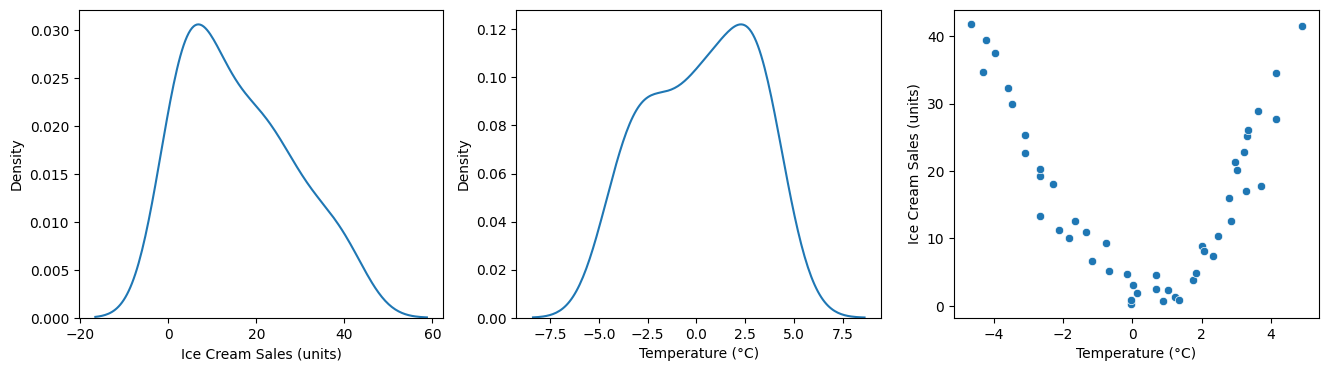

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))


sns.kdeplot(data=df, x='Ice Cream Sales (units)', ax=ax1)
sns.kdeplot(data=df, x="Temperature (°C)", ax=ax2)
sns.scatterplot(data=df, x='Temperature (°C)', y='Ice Cream Sales (units)', ax=ax3)


In [108]:
X=df[['Temperature (°C)']]
y= df['Ice Cream Sales (units)']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Train the Model

In [110]:
lr = LinearRegression()

# lr.fit(X_train.values.reshape(-1,1), y_train)
lr.fit(X_train, y_train)


LinearRegression()

### Step 4: Predict and Evaluate

In [111]:
y_pred = lr.predict(X_test)

In [112]:
print(r2_score(y_test, y_pred))

-0.5751270190188227


Text(0, 0.5, 'Ice Cream Sales')

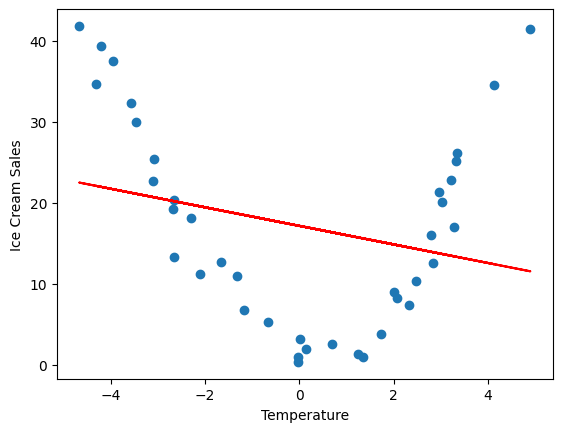

In [113]:
plt.plot(X_train, lr.predict(X_train), color="red") # Pattern learned by model: Red Line
plt.scatter(X_train, y_train)   # Scatter plot of training data
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")

### Repeat Step 3: Apply Polynomial Feature and Train the model

In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [115]:
lr2 = LinearRegression()

lr2.fit(X_train_poly, y_train)

LinearRegression()

### Repeat Step 4: Predict and Evaluate for Polynomial Features

In [116]:
y_pred = lr2.predict(X_test_poly)

print(r2_score(y_test, y_pred))

0.843055137193884


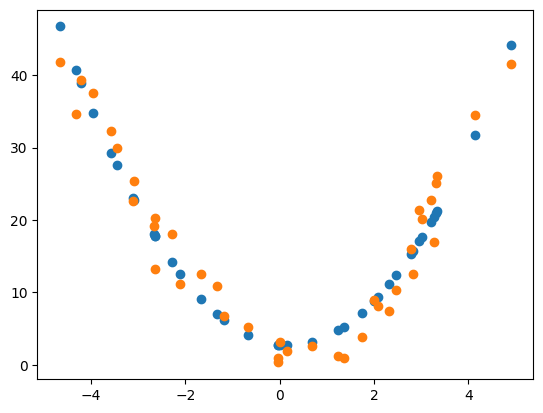

In [117]:
# plt.plot(X_train, lr2.predict(X_train_poly), color="red")
# sns.scatterplot(x=X_train, y=lr2.predict(X_train_poly))

# The non-linear pattern learned by the model: Blue
plt.scatter(X_train, lr2.predict(X_train_poly))

# Scatter plot of training data: Orange
plt.scatter(X_train, y_train)

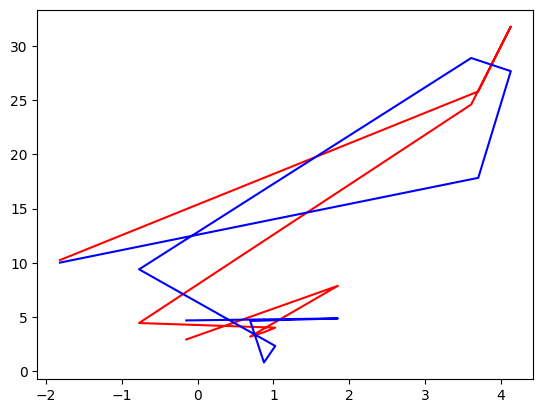

In [126]:
plt.plot(X_test, y_pred, color="red")   # Predicted: red
plt.plot(X_test, y_test, color="blue")  # Actual: Blue

### Repeat Step 2: Preprocessing: Scaling the Data

In [149]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scale.fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

<Axes: title={'center': 'Temperature Distribution After Scaling'}, ylabel='Density'>

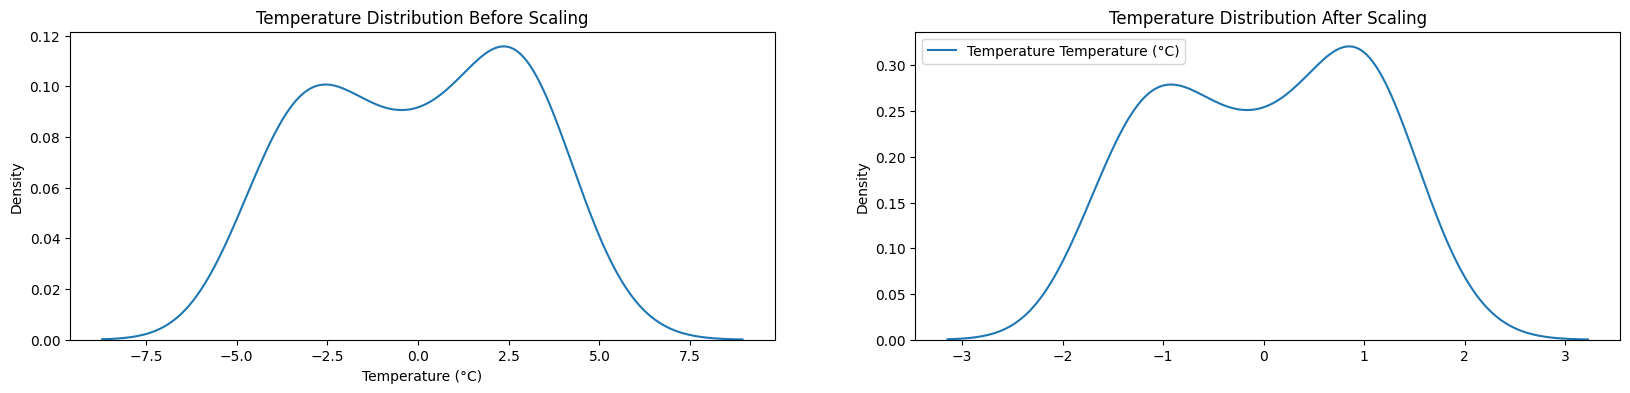

In [150]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,4))

ax1.set_title("Temperature Distribution Before Scaling")
sns.kdeplot(data=X_train, x="Temperature (°C)", ax=ax1)

ax2.set_title("Temperature Distribution After Scaling")
sns.kdeplot(data=pd.DataFrame(X_train_scaled, columns=["Temperature Temperature (°C)"]), ax=ax2)


In [136]:
X_train.mean()

Temperature (°C)    0.004264
dtype: float64

In [137]:
X_train.std()

Temperature (°C)    2.807143
dtype: float64

In [134]:
X_train_scaled.mean()

0.0

In [135]:
X_train_scaled.std()

1.0

### Again Repeat Step 3: Train the Model

In [140]:
lr3 = LinearRegression()

lr3.fit(X_train_scaled, y_train)

LinearRegression()

### Again Repeat Step 4: Predict and Evaluate

In [141]:
y_pred = lr3.predict(X_test_scaled)

print(r2_score(y_test, y_pred))

-0.5751270190188227
